#### import 

In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt 
from scipy.stats import spearmanr, kendalltau


#### load data

In [9]:
data = pd.read_csv('../data/final_dataset_english_only.csv')


In [10]:
data = pd.read_csv('../data/final_dataset_english_only.csv')

print("Shape of dataset:", data.shape)
data.head()

Shape of dataset: (356910, 161)


,Unnamed: 0,commentId,authorChannelId,authorDisplayName,authorChannelUrl,publishedAt_x,updatedAt,likeCount_x,parentId,textDisplay,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
0,10,UgxrR4wFxfCwvp2YUwZ4AaABAg,UC5jUy6FXCr82JYzq96-6_Jw,@a.m_0056skycloud-xf5ec,http://www.youtube.com/@a.m_0056skycloud-xf5ec,2025-07-10T11:05:10Z,2025-07-10T11:05:10Z,0,NaN,This is on of her best songs.🌊,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.29
1,14,Ugw-qH8WQZqma_AugoN4AaABAg,UCPj69nCAxIJCqD0gKRjGGhA,@angelinamidbjerlundholm3058,http://www.youtube.com/@angelinamidbjerlundhol...,2021-11-19T21:16:40Z,2021-11-19T21:16:40Z,0,NaN,Right,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,15,UgywUe9rW4J6ynYErt54AaABAg,UCImqCrcNrl7S1NvrmleWDsg,@thesnesgeek,http://www.youtube.com/@thesnesgeek,2021-04-08T06:18:53Z,2021-04-08T06:18:53Z,2,NaN,"This is her best entry. This time, she is a co...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,17,UgzgxTaLTsQN9OPizbR4AaABAg,UC4YwlR3gBH0m8pvcDIOspaA,@fingerstylemelody8139,http://www.youtube.com/@fingerstylemelody8139,2020-11-26T06:59:25Z,2020-11-26T06:59:25Z,0,NaN,Great,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,18,UgxoGDPYm0L0XFpNoUJ4AaABAg,UC4i1M5RayNtzd5f6Wuyr5sQ,@sarariley8696,http://www.youtube.com/@sarariley8696,2020-07-05T13:10:56Z,2020-07-05T13:10:56Z,2,NaN,This song reminds me of a murder case 4 years ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.36


In [11]:
# for col in data.columns:
#     print(col)

#### Comments per Genre


Comments per genre head (English only):
 genre
groove metal             3002
djent                    2879
progressive metalcore    2774
melodic metalcore        2729
trancecore               2679
easycore                 2607
comedy                   2587
pop punk                 2578
metalcore                2463
electro house            2429
Name: count, dtype: int64

Comments per genre tail (English only):
 genre
samba             60
axe               58
sertanejo         54
brazilian rock    51
rock nacional     50
brega             49
pagode            41
forro             35
mpb               34
rock gaucho       28
Name: count, dtype: int64


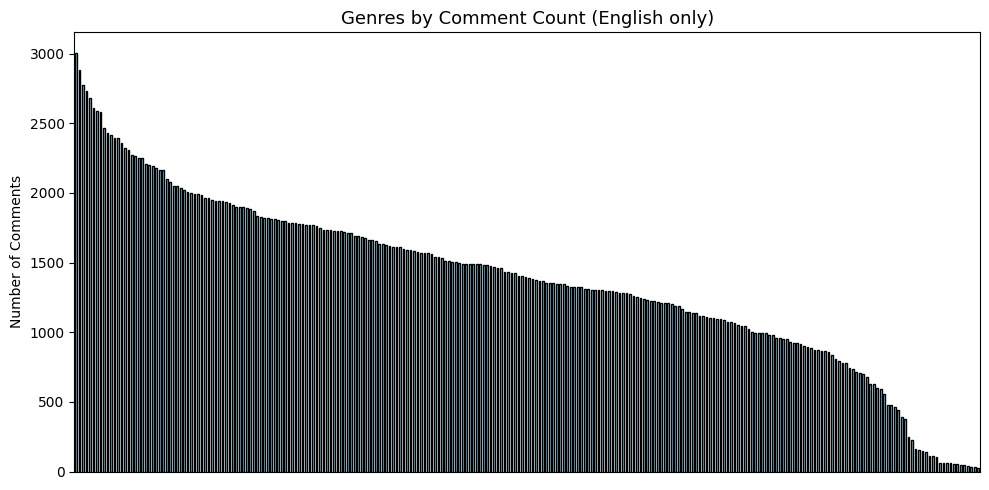

In [12]:
os.makedirs("plots/general_statistics", exist_ok=True)

genre_counts = data['genre'].value_counts()

print("\nComments per genre head (English only):\n", genre_counts.head(10))
print("\nComments per genre tail (English only):\n", genre_counts.tail(10))

plt.figure(figsize=(10,5))
genre_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Genres by Comment Count (English only)", fontsize=13)
plt.ylabel("Number of Comments")
plt.xticks([], [])
plt.xlabel("")
plt.tight_layout()

plt.savefig("plots/general_statistics/genre_comment_counts.png", dpi=300)
plt.show()
plt.close()


#### calculate correlation between likes and sentiment scores

Rank correlations between Video Likes and Average Sentiment Scores:
        sentiment  spearman_corr  spearman_pval  kendall_corr  kendall_pval
0       vader_pos      -0.134537   6.163292e-40     -0.096237  3.376327e-45
1       vader_neg       0.116490   2.662755e-30      0.081051  4.534777e-32
2       vader_neu       0.157878   1.634139e-54      0.112581  2.986117e-61
3  vader_compound      -0.090213   9.012761e-19     -0.063753  8.707186e-21


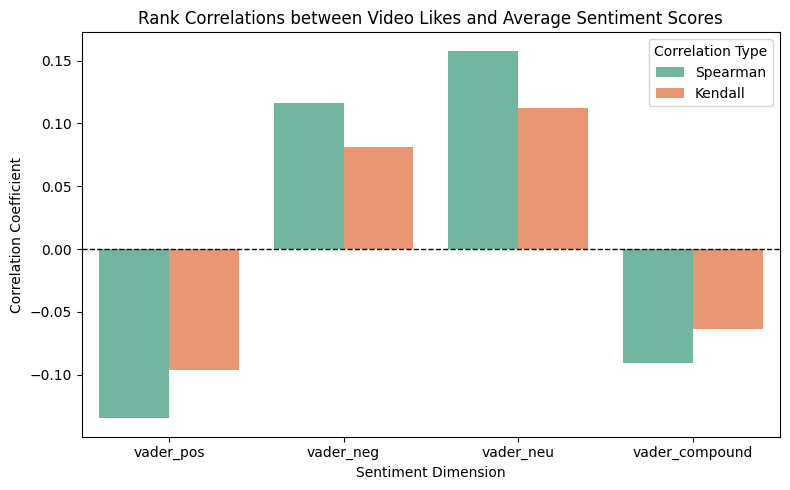

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, kendalltau
import os

# Ensure numeric types
for col in ["likeCount_y", "vader_pos", "vader_neg", "vader_neu", "vader_compound"]:
    data[col] = pd.to_numeric(data[col], errors="coerce")

# Drop rows with missing values
data_clean = data.dropna(subset=["likeCount_y", "vader_pos", "vader_neg", "vader_neu", "vader_compound"])

# --- Aggregate sentiment per video ---
video_sentiment = (
    data_clean.groupby("videoId", as_index=False)
    .agg({
        "likeCount_y": "first",  # video-level likes (constant per video)
        "vader_pos": "mean",
        "vader_neg": "mean",
        "vader_neu": "mean",
        "vader_compound": "mean"
    })
)

# --- Compute rank correlations ---
results_video = []
for sentiment in ["vader_pos", "vader_neg", "vader_neu", "vader_compound"]:
    spearman_corr, spearman_p = spearmanr(video_sentiment["likeCount_y"], video_sentiment[sentiment])
    kendall_corr, kendall_p = kendalltau(video_sentiment["likeCount_y"], video_sentiment[sentiment])
    
    results_video.append({
        "sentiment": sentiment,
        "spearman_corr": spearman_corr,
        "spearman_pval": spearman_p,
        "kendall_corr": kendall_corr,
        "kendall_pval": kendall_p
    })

results_video_df = pd.DataFrame(results_video)

print("Rank correlations between Video Likes and Average Sentiment Scores:")
print(results_video_df)

# --- Prepare data for plotting ---
plot_video_df = results_video_df.melt(
    id_vars="sentiment",
    value_vars=["spearman_corr", "kendall_corr"],
    var_name="correlation_type",
    value_name="correlation"
)

plot_video_df["correlation_type"] = plot_video_df["correlation_type"].map({
    "spearman_corr": "Spearman",
    "kendall_corr": "Kendall"
})

# Ensure output directory exists
os.makedirs("plots/general_statistics", exist_ok=True)

# --- Plot ---
plt.figure(figsize=(8, 5))
sns.barplot(
    data=plot_video_df,
    x="sentiment", y="correlation", hue="correlation_type",
    palette="Set2"
)

plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.title("Rank Correlations between Video Likes and Average Sentiment Scores")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Sentiment Dimension")
plt.legend(title="Correlation Type")
plt.tight_layout()

# Save and show
plt.savefig("plots/general_statistics/video_likes_sentiment_rank_correlations.png", dpi=300)
plt.show()


#### Interpretation of plots:

#### Researchquestion
###### Do videos with more likes tend to receive comments with more positive, negative, or neutral sentiment?

All your Spearman (≈ 0.09–0.16) and Kendall (≈ 0.06–0.11) correlations have very low p-values, so they are statistically significant.

However, the effect sizes are weak: by common guidelines, |ρ| < 0.1 is negligible, 0.1–0.3 is weak. Your values sit right at the weak threshold.

This means that while the associations are real (not random), they are not strong enough to be considered practically meaningful.

In other words: video likes and comment sentiment are related, but only very weakly — likes do not systematically predict sentiment polarity in any substantial way.

#### calculate correlation between views and sentiment scores

Rank correlations between Video Views and Average Sentiment Scores:
        sentiment  spearman_corr  spearman_pval  kendall_corr  kendall_pval
0       vader_pos      -0.136366   3.716100e-41     -0.097011  4.317512e-46
1       vader_neg       0.090574   5.544593e-19      0.061982  1.667018e-19
2       vader_neu       0.169641   4.942231e-63      0.120785  1.595214e-70
3  vader_compound      -0.080615   2.399264e-15     -0.056399  1.132238e-16


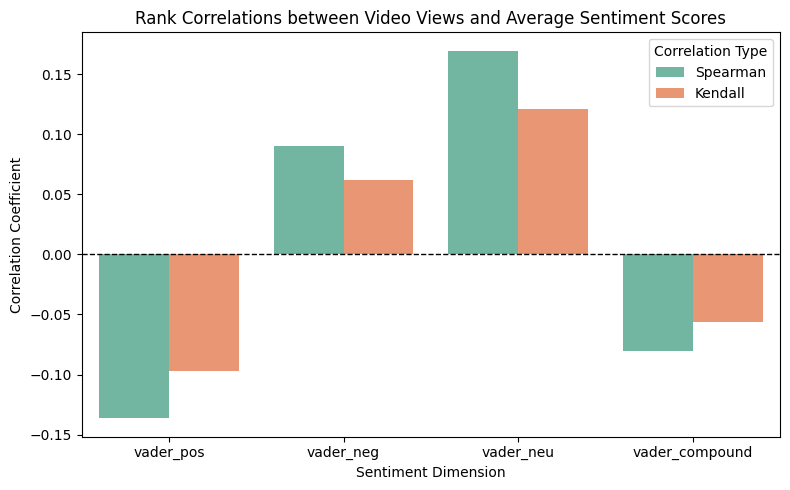

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, kendalltau
import os

# Ensure numeric types
for col in ["viewCount", "vader_pos", "vader_neg", "vader_neu", "vader_compound"]:
    data[col] = pd.to_numeric(data[col], errors="coerce")

# Drop rows with missing values
data_clean = data.dropna(subset=["viewCount", "vader_pos", "vader_neg", "vader_neu", "vader_compound"])

# --- Aggregate sentiment per video ---
video_sentiment = (
    data_clean.groupby("videoId", as_index=False)
    .agg({
        "viewCount": "first",  # video-level views (constant per video)
        "vader_pos": "mean",
        "vader_neg": "mean",
        "vader_neu": "mean",
        "vader_compound": "mean"
    })
)

# --- Compute rank correlations ---
results_video = []
for sentiment in ["vader_pos", "vader_neg", "vader_neu", "vader_compound"]:
    spearman_corr, spearman_p = spearmanr(video_sentiment["viewCount"], video_sentiment[sentiment])
    kendall_corr, kendall_p = kendalltau(video_sentiment["viewCount"], video_sentiment[sentiment])
    
    results_video.append({
        "sentiment": sentiment,
        "spearman_corr": spearman_corr,
        "spearman_pval": spearman_p,
        "kendall_corr": kendall_corr,
        "kendall_pval": kendall_p
    })

results_video_df = pd.DataFrame(results_video)

print("Rank correlations between Video Views and Average Sentiment Scores:")
print(results_video_df)

# --- Prepare data for plotting ---
plot_video_df = results_video_df.melt(
    id_vars="sentiment",
    value_vars=["spearman_corr", "kendall_corr"],
    var_name="correlation_type",
    value_name="correlation"
)

plot_video_df["correlation_type"] = plot_video_df["correlation_type"].map({
    "spearman_corr": "Spearman",
    "kendall_corr": "Kendall"
})

# Ensure output directory exists
os.makedirs("plots/general_statistics", exist_ok=True)

# --- Plot ---
plt.figure(figsize=(8, 5))
sns.barplot(
    data=plot_video_df,
    x="sentiment", y="correlation", hue="correlation_type",
    palette="Set2"
)

plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.title("Rank Correlations between Video Views and Average Sentiment Scores")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Sentiment Dimension")
plt.legend(title="Correlation Type")
plt.tight_layout()

# Save and show
plt.savefig("plots/general_statistics/video_views_sentiment_rank_correlations.png", dpi=300)
plt.show()


#### Researchquestion
###### Do videos with more views tend to receive comments with more positive, negative, or neutral sentiment?

All your Spearman (≈ –0.14 to +0.17) and Kendall (≈ –0.10 to +0.12) correlations have very low p-values, so they are statistically significant.

However, the effect sizes are weak: by common guidelines, |ρ| < 0.1 is negligible and 0.1–0.3 is weak. Only the correlations with neutral sentiment (ρ ≈ 0.17, τ ≈ 0.12) and positive sentiment (ρ ≈ –0.14, τ ≈ –0.10) reach the weak range.

This means that while the associations are real (not random), they are not strong enough to be considered practically meaningful.

In other words: video views and comment sentiment are only very weakly related — videos with more views tend to have slightly more neutral and slightly fewer positive comments, but the overall effect is small.

### calculate correlation between comment count and sentiment scores

Rank correlations between Number of Comments and Average Sentiment Scores:
        sentiment  spearman_corr  spearman_pval  kendall_corr  kendall_pval
0       vader_pos      -0.171497   2.125264e-64     -0.124654  1.170365e-74
1       vader_neg       0.151961   8.561930e-51      0.107631  2.929890e-55
2       vader_neu       0.182809   4.547881e-73      0.132358  5.156668e-84
3  vader_compound      -0.116597   1.789033e-30     -0.083617  1.330852e-34


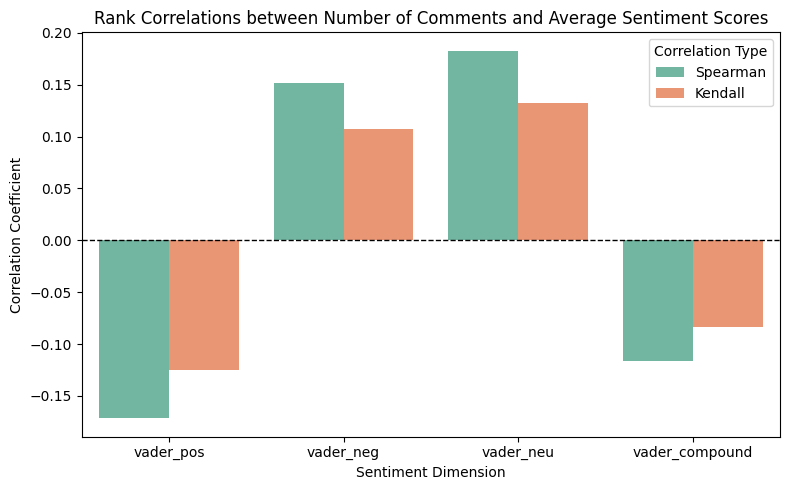

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, kendalltau
import os

# Ensure numeric types
for col in ["commentCount", "vader_pos", "vader_neg", "vader_neu", "vader_compound"]:
    data[col] = pd.to_numeric(data[col], errors="coerce")

# Drop rows with missing values
data_clean = data.dropna(subset=["commentCount", "vader_pos", "vader_neg", "vader_neu", "vader_compound"])

# --- Aggregate sentiment per video ---
video_sentiment = (
    data_clean.groupby("videoId", as_index=False)
    .agg({
        "commentCount": "first",
        "vader_pos": "mean",
        "vader_neg": "mean",
        "vader_neu": "mean",
        "vader_compound": "mean"
    })
)

# --- Compute rank correlations ---
results_video = []
for sentiment in ["vader_pos", "vader_neg", "vader_neu", "vader_compound"]:
    spearman_corr, spearman_p = spearmanr(video_sentiment["commentCount"], video_sentiment[sentiment])
    kendall_corr, kendall_p = kendalltau(video_sentiment["commentCount"], video_sentiment[sentiment])
    
    results_video.append({
        "sentiment": sentiment,
        "spearman_corr": spearman_corr,
        "spearman_pval": spearman_p,
        "kendall_corr": kendall_corr,
        "kendall_pval": kendall_p
    })

results_video_df = pd.DataFrame(results_video)

print("Rank correlations between Number of Comments and Average Sentiment Scores:")
print(results_video_df)

# --- Prepare data for plotting ---
plot_video_df = results_video_df.melt(
    id_vars="sentiment",
    value_vars=["spearman_corr", "kendall_corr"],
    var_name="correlation_type",
    value_name="correlation"
)

plot_video_df["correlation_type"] = plot_video_df["correlation_type"].map({
    "spearman_corr": "Spearman",
    "kendall_corr": "Kendall"
})

# Ensure output directory exists
os.makedirs("plots/general_statistics", exist_ok=True)

# --- Plot ---
plt.figure(figsize=(8, 5))
sns.barplot(
    data=plot_video_df,
    x="sentiment", y="correlation", hue="correlation_type",
    palette="Set2"
)

plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.title("Rank Correlations between Number of Comments and Average Sentiment Scores")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Sentiment Dimension")
plt.legend(title="Correlation Type")
plt.tight_layout()

# Save and show
plt.savefig("plots/general_statistics/video_comments_sentiment_rank_correlations.png", dpi=300)
plt.show()


#### Researchquestion
###### Do videos with more views tend to receive comments with more positive, negative, or neutral sentiment?

All correlations have very low p-values, so they are statistically significant.

Effect sizes are in the weak range (0.1–0.2).

This means that videos with many comments tend to attract a mix of neutral and negative comments, while positivity declines.

However, the associations are not strong enough to be considered practically meaningful.

#### Do users who watch less-viewed videos tend to comment more?

In [43]:
import pandas as pd
from scipy.stats import spearmanr, kendalltau

# Ensure numeric
for col in ["viewCount", "commentCount"]:
    data[col] = pd.to_numeric(data[col], errors="coerce")

# Drop missing
video_stats = (
    data.dropna(subset=["viewCount", "commentCount"])
    .groupby("videoId", as_index=False)
    .agg({
        "viewCount": "first",
        "commentCount": "first"
    })
)

# Compute comment density
video_stats["comment_density"] = video_stats["commentCount"] / video_stats["viewCount"]

# Correlations
spearman_corr, spearman_p = spearmanr(video_stats["viewCount"], video_stats["comment_density"])
kendall_corr, kendall_p = kendalltau(video_stats["viewCount"], video_stats["comment_density"])

print("Correlation between Views and Comment Density:")
print(f"Spearman: {spearman_corr:.4f} (p={spearman_p:.2e})")
print(f"Kendall:  {kendall_corr:.4f} (p={kendall_p:.2e})")


Correlation between Views and Comment Density:
Spearman: -0.4268 (p=0.00e+00)
Kendall:  -0.2966 (p=0.00e+00)


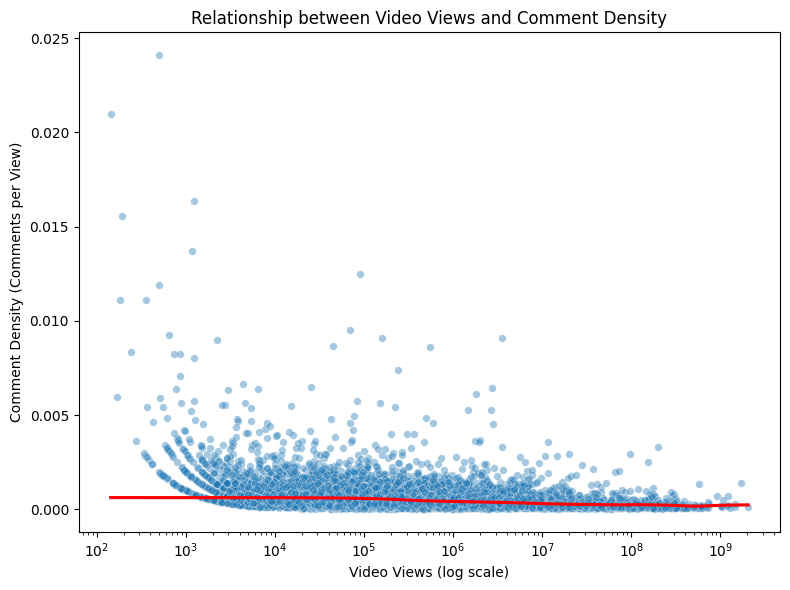

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure no division errors
video_stats = video_stats[video_stats["viewCount"] > 0].copy()
video_stats["comment_density"] = video_stats["commentCount"] / video_stats["viewCount"]

# --- Plot ---
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=video_stats,
    x="viewCount", y="comment_density",
    alpha=0.4, s=30
)

# Log scale for views (skewed distribution)
plt.xscale("log")

# Add trendline (lowess smoother for curved trend)
sns.regplot(
    data=video_stats,
    x="viewCount", y="comment_density",
    scatter=False, lowess=True, color="red"
)

plt.title("Relationship between Video Views and Comment Density")
plt.xlabel("Video Views (log scale)")
plt.ylabel("Comment Density (Comments per View)")
plt.tight_layout()
plt.savefig("plots/general_statistics/views_vs_comment_density.png", dpi=300)
plt.show()


Both coefficients are negative, showing that as viewCount increases, the ratio of comments per view (comment density) decreases.

The effect is moderate in strength:

Spearman (–0.43) suggests a clear monotonic downward trend.

Kendall (–0.30) confirms the same relationship with a stricter, pairwise measure.

The p-values are effectively zero, so the result is statistically robust.

What it means in practice

Less-viewed videos: attract proportionally more comments per viewer, meaning their audiences are more engaged.

Highly viewed videos: while they get huge numbers of comments, these are small compared to their massive view counts → most viewers remain silent.

The finding highlights a difference between attention scale (views) and engagement intensity (commenting).

##### outlier

In [46]:
# Ensure no division by zero
video_stats = video_stats[video_stats["viewCount"] > 0].copy()

# Compute comment density
video_stats["comment_density"] = video_stats["commentCount"] / video_stats["viewCount"]

# Find video with max density
max_row = video_stats.loc[video_stats["comment_density"].idxmax()]

print("Video with highest comment density:")
print("VideoId:", max_row["videoId"])
print("Views:", max_row["viewCount"])
print("Comments:", max_row["commentCount"])
print("Comment Density:", max_row["comment_density"])


Video with highest comment density:
VideoId: axvB1Bb5S40
Views: 498
Comments: 12
Comment Density: 0.024096385542168676


## Histogram of Positive and Negative Sentiment Scores

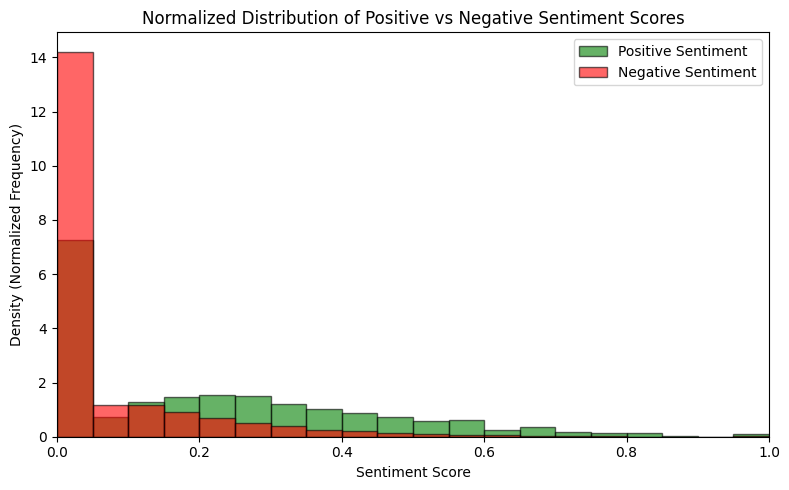

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure numeric conversion
for col in ["vader_pos", "vader_neg"]:
    data[col] = pd.to_numeric(data[col], errors="coerce")

# Drop missing
sent_data = data.dropna(subset=["vader_pos", "vader_neg"])

# Define bins between 0 and 1
bins = np.linspace(0, 1, 21)  # 20 bins of width 0.05

# --- Plot ---
plt.figure(figsize=(8, 5))

plt.hist(
    sent_data["vader_pos"], bins=bins,
    color="green", alpha=0.6, edgecolor="black",
    label="Positive Sentiment", density=True
)
plt.hist(
    sent_data["vader_neg"], bins=bins,
    color="red", alpha=0.6, edgecolor="black",
    label="Negative Sentiment", density=True
)

plt.xlabel("Sentiment Score")
plt.ylabel("Density (Normalized Frequency)")
plt.title("Normalized Distribution of Positive vs Negative Sentiment Scores")
plt.xlim(0, 1)
plt.legend()

plt.tight_layout()
plt.savefig("plots/general_statistics/sentiment_histograms_overlay_normalized.png", dpi=300)
plt.show()


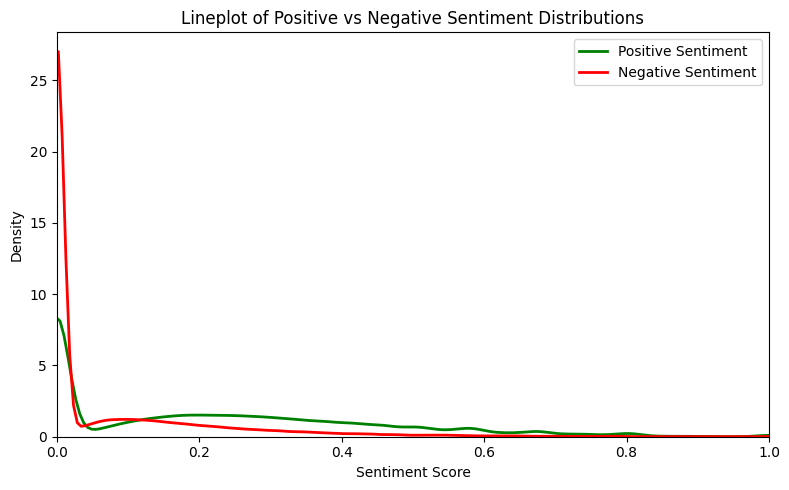

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure numeric conversion
for col in ["vader_pos", "vader_neg"]:
    data[col] = pd.to_numeric(data[col], errors="coerce")

# Drop missing
sent_data = data.dropna(subset=["vader_pos", "vader_neg"])

# --- Plot ---
plt.figure(figsize=(8, 5))

sns.kdeplot(sent_data["vader_pos"], color="green", lw=2, label="Positive Sentiment")
sns.kdeplot(sent_data["vader_neg"], color="red", lw=2, label="Negative Sentiment")

plt.xlabel("Sentiment Score")
plt.ylabel("Density")
plt.title("Lineplot of Positive vs Negative Sentiment Distributions")
plt.xlim(0, 1)
plt.legend()

plt.tight_layout()
plt.savefig("plots/general_statistics/sentiment_distributions_lineplot.png", dpi=300)
plt.show()


## Jensen–Shannon Divergence (JSD) between Positive and Negative Sentiment Distributions


In [56]:
import numpy as np
from scipy.spatial.distance import jensenshannon

# Ensure numeric
for col in ["vader_pos", "vader_neg"]:
    data[col] = pd.to_numeric(data[col], errors="coerce")

# Drop missing
sent_data = data.dropna(subset=["vader_pos", "vader_neg"])

# Define bins between 0 and 1
bins = np.linspace(0, 1, 21)  # 20 bins of width 0.05

# Histogram counts
pos_hist, _ = np.histogram(sent_data["vader_pos"], bins=bins)
neg_hist, _ = np.histogram(sent_data["vader_neg"], bins=bins)

# Normalize to probability distributions
pos_prob = pos_hist / pos_hist.sum()
neg_prob = neg_hist / neg_hist.sum()

# Jensen–Shannon Divergence
jsd = jensenshannon(pos_prob, neg_prob, base=2) ** 2  # SciPy returns sqrt(JS), square it
print(f"Jensen–Shannon Divergence (Positive vs Negative): {jsd:.4f}")


Jensen–Shannon Divergence (Positive vs Negative): 0.1256


The distributions of positive and negative scores are fairly similar overall (both heavily concentrated near 0).

## Jensen–Shannon Divergence (JSD) per Genre (Polarity)

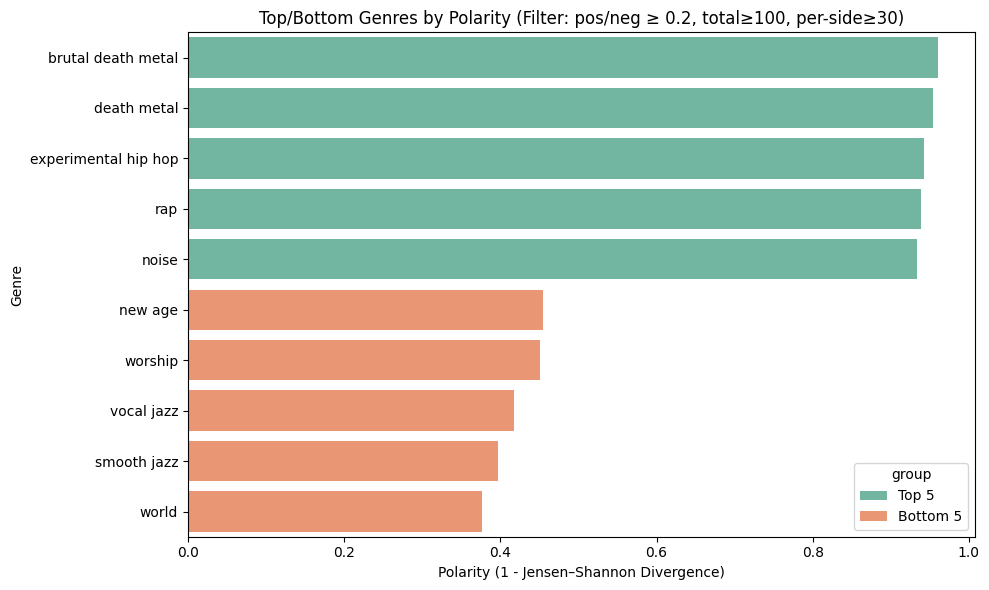

Top 5:
                    genre  polarity  n_non_neutral  n_pos_ge_min  \
24     brutal death metal  0.960040            695           448   
42            death metal  0.954331            600           389   
74   experimental hip hop  0.943126           1042           695   
184                   rap  0.938162            872           580   
154                 noise  0.933480            559           371   

     n_neg_ge_min  share_non_neutral  
24            331           0.622760  
42            294           0.610376  
74            424           0.530550  
184           354           0.506094  
154           229           0.534928  

Bottom 5:
           genre  polarity  n_non_neutral  n_pos_ge_min  n_neg_ge_min  \
148      new age  0.454870            743           669            97   
236      worship  0.451238           1379          1252           173   
231   vocal jazz  0.417376            833           761            87   
199  smooth jazz  0.397050           1315      

In [7]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import jensenshannon
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------- Params ----------------
min_val = 0.20                  # Relevanz-Schwelle für pos/neg (Neutralitäts-Filter)
min_total_non_neutral = 100     # Mindestanzahl relevanter Kommentare insgesamt pro Genre
min_each_side = 30              # Mindestanzahl je Seite: pos>=min_val UND neg>=min_val
bins = np.linspace(0, 1, 21)    # 20 Bins (Breite 0.05)

# --------------- Prep data --------------
for col in ["vader_pos", "vader_neg"]:
    data[col] = pd.to_numeric(data[col], errors="coerce")

df = data.dropna(subset=["genre", "vader_pos", "vader_neg"]).copy()

# Relevante (nicht-neutrale) Kommentare behalten
relevant = df[(df["vader_pos"] >= min_val) | (df["vader_neg"] >= min_val)]

rows = []
for genre, sub in relevant.groupby("genre"):
    n_total = len(sub)
    if n_total < min_total_non_neutral:
        continue

    # Zähle pro Seite
    n_pos = (sub["vader_pos"] >= min_val).sum()
    n_neg = (sub["vader_neg"] >= min_val).sum()

    # Mindestanzahl je Seite (Stabilität)
    if (n_pos < min_each_side) or (n_neg < min_each_side):
        continue

    # Histogramme (nur relevante Kommentare)
    pos_hist, _ = np.histogram(sub["vader_pos"], bins=bins)
    neg_hist, _ = np.histogram(sub["vader_neg"], bins=bins)

    # Sicherstellen, dass beide Verteilungen Masse haben
    if pos_hist.sum() == 0 or neg_hist.sum() == 0:
        continue

    # Wahrscheinlichkeitsverteilungen
    p = pos_hist / pos_hist.sum()
    q = neg_hist / neg_hist.sum()

    # JSD (base=2) und Polarity = 1 - JSD
    jsd = jensenshannon(p, q, base=2) ** 2
    polarity = 1 - jsd

    # Zusätzlich: Anteil nicht-neutraler Kommentare an allen Kommentaren im Genre (optional für Reporting)
    genre_all = df[df["genre"] == genre]
    share_non_neutral = len(relevant[relevant["genre"] == genre]) / max(len(genre_all), 1)

    rows.append({
        "genre": genre,
        "polarity": polarity,
        "jsd": jsd,
        "n_non_neutral": n_total,
        "n_pos_ge_min": n_pos,
        "n_neg_ge_min": n_neg,
        "share_non_neutral": share_non_neutral
    })

polarity_df = pd.DataFrame(rows).sort_values("polarity", ascending=False)

# --- Top/Bottom Visualisierung ---
top5 = polarity_df.head(5)
bottom5 = polarity_df.tail(5)

plt.figure(figsize=(10, 6))
plot_df = pd.concat([top5.assign(group="Top 5"), bottom5.assign(group="Bottom 5")])
sns.barplot(
    data=plot_df,
    x="polarity", y="genre", hue="group", dodge=False, palette="Set2"
)
plt.xlabel("Polarity (1 - Jensen–Shannon Divergence)")
plt.ylabel("Genre")
plt.title(f"Top/Bottom Genres by Polarity "
          f"(Filter: pos/neg ≥ {min_val}, total≥{min_total_non_neutral}, per-side≥{min_each_side})")
plt.tight_layout()
plt.savefig("plots/general_statistics/genre_polarity_two_thresholds.png", dpi=300)
plt.show()

print("Top 5:")
print(top5[["genre","polarity","n_non_neutral","n_pos_ge_min","n_neg_ge_min","share_non_neutral"]])
print("\nBottom 5:")
print(bottom5[["genre","polarity","n_non_neutral","n_pos_ge_min","n_neg_ge_min","share_non_neutral"]])


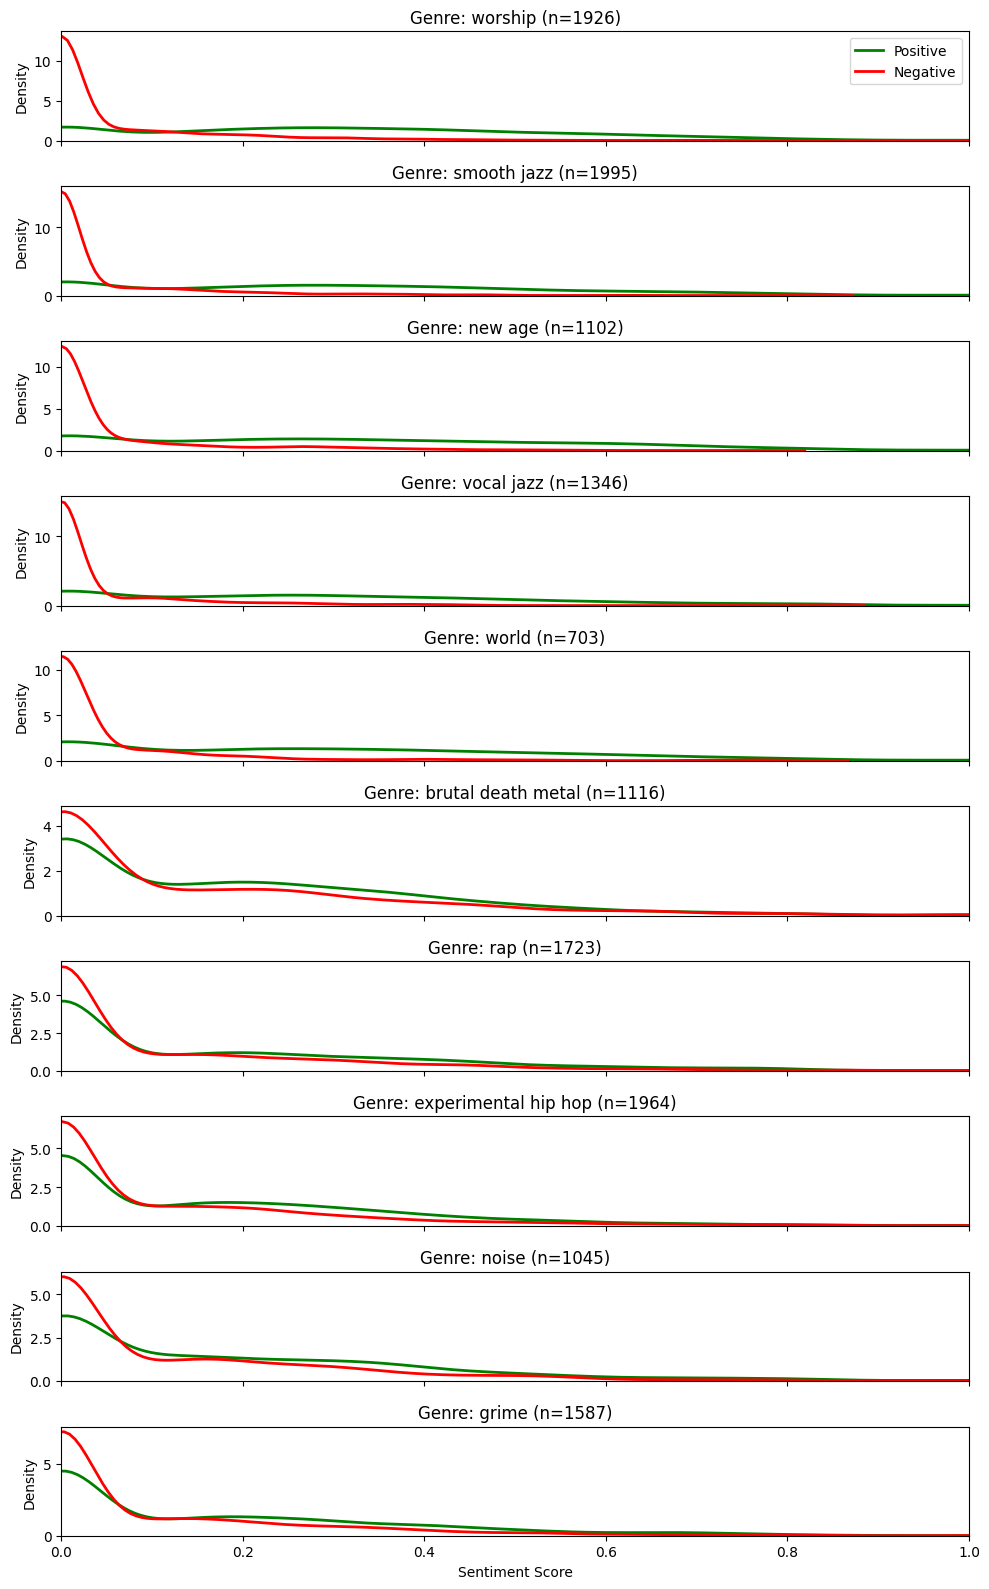

In [64]:
# --- Visualization of sentiment distributions for Top 5 and Bottom 5 genres (lineplots) ---
top5_genres = top5["genre"].tolist()
bottom5_genres = bottom5["genre"].tolist()
selected_genres = top5_genres + bottom5_genres

fig, axes = plt.subplots(len(selected_genres), 1, figsize=(10, 16), sharex=True)

for i, genre in enumerate(selected_genres):
    subset = sent_data[sent_data["genre"] == genre]
    
    # Lineplots (KDE)
    sns.kdeplot(subset["vader_pos"], color="green", lw=2, label="Positive", ax=axes[i])
    sns.kdeplot(subset["vader_neg"], color="red", lw=2, label="Negative", ax=axes[i])
    
    axes[i].set_xlim(0, 1)
    axes[i].set_ylabel("Density")
    axes[i].set_title(f"Genre: {genre} (n={len(subset)})")
    if i == 0:  # show legend only once
        axes[i].legend()

plt.xlabel("Sentiment Score")
plt.tight_layout()
plt.savefig("plots/general_statistics/top5_bottom5_genre_sentiment_distributions_lineplot.png", dpi=300)
plt.show()


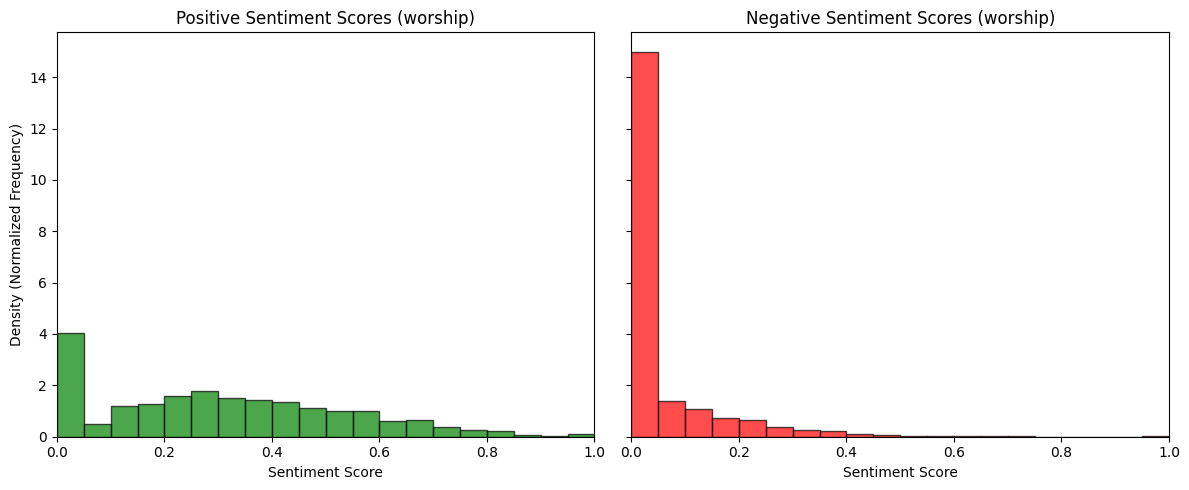

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Beispiel: Genre auswählen (z. B. "worship")
genre_to_plot = "worship"

# Subset der Daten
subset = data[data["genre"] == genre_to_plot].dropna(subset=["vader_pos", "vader_neg"])

# Bins definieren
bins = np.linspace(0, 1, 21)  # 20 bins zwischen 0 und 1

# --- Plot ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Positive Sentiment
axes[0].hist(
    subset["vader_pos"], bins=bins,
    color="green", alpha=0.7, edgecolor="black", density=True
)
axes[0].set_title(f"Positive Sentiment Scores ({genre_to_plot})")
axes[0].set_xlabel("Sentiment Score")
axes[0].set_ylabel("Density (Normalized Frequency)")
axes[0].set_xlim(0, 1)

# Negative Sentiment
axes[1].hist(
    subset["vader_neg"], bins=bins,
    color="red", alpha=0.7, edgecolor="black", density=True
)
axes[1].set_title(f"Negative Sentiment Scores ({genre_to_plot})")
axes[1].set_xlabel("Sentiment Score")
axes[1].set_xlim(0, 1)

plt.tight_layout()
plt.savefig(f"plots/general_statistics/{genre_to_plot}_pos_neg_hist_separate.png", dpi=300)
plt.show()
